## Proyecto_ParteIII

In [12]:
import pandas as pd
import numpy as NP

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado y modelado
from scipy import stats #Contiene función pearsonr
from scipy import special
from sklearn.model_selection import train_test_split #Particionamiento de datos
from sklearn.linear_model import LinearRegression #Para el Análisis de Regresión Lineal
from sklearn.linear_model import RANSACRegressor #Para el Análisis de Regresión RANSAC
from sklearn.metrics import r2_score #Para la métrica de R2
from sklearn.metrics import mean_squared_error #Para la métrica de Error Cuadrático Medio
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math as m

In [13]:
df_creditcard = pd.read_csv('creditcard.csv',  sep=',')
df_creditcard.info()
df_creditcard.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [65]:
# Preprocesado y modelado
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import metrics 


#Mostrar los gráficos en línea
from IPython.display import Image
%matplotlib inline

In [15]:
df_creditcard.shape

(284807, 31)

In [16]:
df_creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
#Extrayendo sólo variables de interés
df_creditcard=df_creditcard.drop(['Time'],axis=1)
df_creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [18]:
df_creditcard.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
#Evaluación de valores nulos.
sum(df_creditcard.isnull().sum())

0

Asignamos el 60% y 40% a la data de entrenamiento y testeo respectivamente.

In [22]:
x=df_creditcard.iloc[:,0:df_creditcard.shape[1]-1].values
y=df_creditcard.iloc[:,df_creditcard.shape[1]-1].values

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,
                                           y,
                                           test_size=0.4,
                                           random_state=2020,
                                           stratify=y)


Creamos un dataframe a partir de la data de entrenamiento con la tecnica de balanceo de datos "UnderSampling" y parámetro de balanceo 0.7.

In [24]:
frec =pd.value_counts(df_creditcard.Class,sort=True)
frec

'0'    284315
'1'       492
Name: Class, dtype: int64

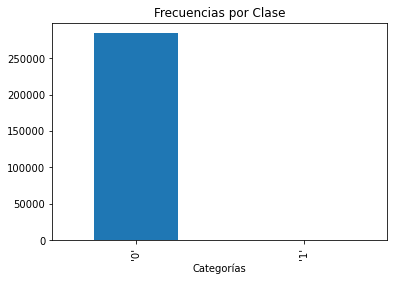

In [27]:
frec.plot.bar()
plt.title('Frecuencias por Clase')
plt.xlabel('Categorías')
plt.show()

Como los datos estan desbalanceados, se utilizará el método de UNDERSAMPLING

In [37]:
under=RandomUnderSampler(sampling_strategy=0.7,random_state=2020)
xtrain_under,ytrain_under=US.fit_resample(xtrain,ytrain)


In [44]:
columnas=df_creditcard.columns.to_list()
target=columnas[29]
xnames=[v for v in columnas if v not in target]

In [45]:
xtrain_underdf=pd.DataFrame(xtrain_under,columns=xnames)
ytrain_underdf=pd.DataFrame(ytrain_under,columns=[target])
creditcard_underdf=pd.concat([xtrain_underdf,ytrain_underdf],axis=1)
creditcard_underdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.260649,-0.030841,1.511764,1.737093,-0.545235,0.803194,-0.147086,0.634376,-0.407117,-0.575789,...,0.447191,0.977625,0.210376,-0.369569,-0.205674,-0.025768,0.078988,0.014317,181.00,'0'
1,-0.723595,0.886183,1.150672,0.391412,0.858233,-0.451287,0.953016,-0.043161,-0.340621,-0.628392,...,-0.105369,-0.124661,-0.339267,-0.139183,0.864433,-0.587594,0.042192,-0.194194,35.00,'0'
2,-0.078087,1.312306,-0.814996,0.460043,0.926552,0.118726,0.509998,0.424253,-0.815809,0.157556,...,0.112914,0.382029,-0.154604,-1.387789,-0.491317,-0.322915,0.307348,0.140480,3.99,'0'
3,1.262640,-0.607678,0.069058,-0.664642,-0.929318,-1.064762,-0.246169,-0.203661,-1.235834,0.815962,...,0.252795,0.470350,-0.145267,0.559499,0.579214,-0.181565,-0.033786,0.008617,72.00,'0'
4,-4.636026,-3.337417,-0.550510,-2.289174,-0.451061,0.708961,-1.436115,1.620583,-2.425287,-0.092202,...,-0.097411,0.089242,0.245200,-1.604362,0.584220,-0.014371,0.105883,-1.298888,59.00,'0'


In [46]:
frec_UNDER=pd.value_counts(creditcard_underdf.Class,sort=True)
frec_UNDER

'0'    421
'1'    295
Name: Class, dtype: int64